In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.columns= ['a','b','c','d','e','f','g','h','labels']

In [77]:
corr=data.groupby('labels').mean()

In [78]:
corr.corr()

,a,b,c,d,e,f,g,h
a,1.000000,-0.299201,-0.372612,-0.087809,0.124345,-0.110388,-0.244223,0.088815
b,-0.299201,1.000000,-0.321802,0.154319,-0.004321,-0.283669,-0.293529,-0.043304
c,-0.372612,-0.321802,1.000000,-0.308995,0.390736,0.010790,0.098679,-0.137399
d,-0.087809,0.154319,-0.308995,1.000000,-0.673208,-0.186639,-0.441067,0.261287
e,0.124345,-0.004321,0.390736,-0.673208,1.000000,-0.241187,0.221732,-0.159483
f,-0.110388,-0.283669,0.010790,-0.186639,-0.241187,1.000000,-0.176815,-0.019069
g,-0.244223,-0.293529,0.098679,-0.441067,0.221732,-0.176815,1.000000,-0.162198
h,0.088815,-0.043304,-0.137399,0.261287,-0.159483,-0.019069,-0.162198,1.000000


In [5]:
data.isnull().sum().sum() #checking missing values

0

In [8]:
data.head()

,a,b,c,d,e,f,g,h,labels
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
X = data.drop('labels',axis=1).values

In [11]:
y = data['labels'].values

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=(8,),activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(6,activation = "relu"),
    tf.keras.layers.Dense(1) 
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mae'])

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [37]:
model.fit(X_train,y_train,epochs=300,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 721 samples, validate on 309 samples
Epoch 1/300
721/721 [==============================] - 0s 117us/sample - loss: 86.0299 - mae: 7.2595 - val_loss: 84.5464 - val_mae: 6.9405
Epoch 2/300
721/721 [==============================] - 0s 110us/sample - loss: 83.4204 - mae: 7.1129 - val_loss: 83.1149 - val_mae: 6.8873
Epoch 3/300
721/721 [==============================] - 0s 105us/sample - loss: 82.7636 - mae: 7.1115 - val_loss: 82.1820 - val_mae: 6.8226
Epoch 4/300
721/721 [==============================] - 0s 105us/sample - loss: 80.4357 - mae: 6.9676 - val_loss: 84.9010 - val_mae: 6.9683
Epoch 5/300
721/721 [==============================] - 0s 105us/sample - loss: 81.8083 - mae: 7.0621 - val_loss: 81.8256 - val_mae: 6.8159
Epoch 6/300
721/721 [==============================] - 0s 122us/sample - loss: 80.0041 - mae: 6.9043 - val_loss: 82.0997 - val_mae: 6.8346
Epoch 7/300
721/721 [==============================] - 0s 105us/sample - loss: 81.1311 - mae: 6.9900 - val_loss: 89.0237

In [38]:
losses = pd.DataFrame(model.history.history)
losses

,loss,mae,val_loss,val_mae
0,86.029923,7.259475,84.546360,6.940464
1,83.420397,7.112913,83.114882,6.887273
2,82.763595,7.111490,82.182039,6.822576
3,80.435710,6.967637,84.900958,6.968263
4,81.808288,7.062056,81.825633,6.815889
5,80.004117,6.904265,82.099666,6.834626
6,81.131059,6.989986,89.023670,7.208377
7,83.007000,7.092752,82.003941,6.848491
8,81.842762,7.036979,84.663183,6.953944
9,80.859392,7.010335,82.571163,6.844322


In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

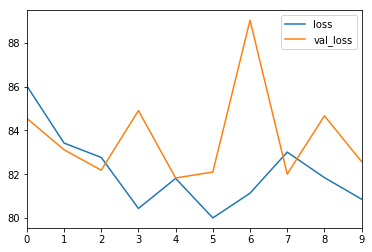

In [40]:
losses[['loss','val_loss']].plot()

In [66]:
pred = model.predict(X_test)

In [65]:
from sklearn import metrics

In [75]:
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 6.844321913487702
MSE: 82.57115985150685
RMSE: 9.086867438865104
